# Objective : Customers Clustering

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Clustering (Using the ML)


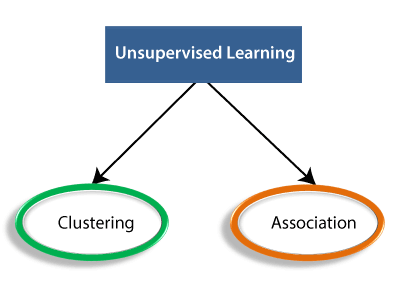

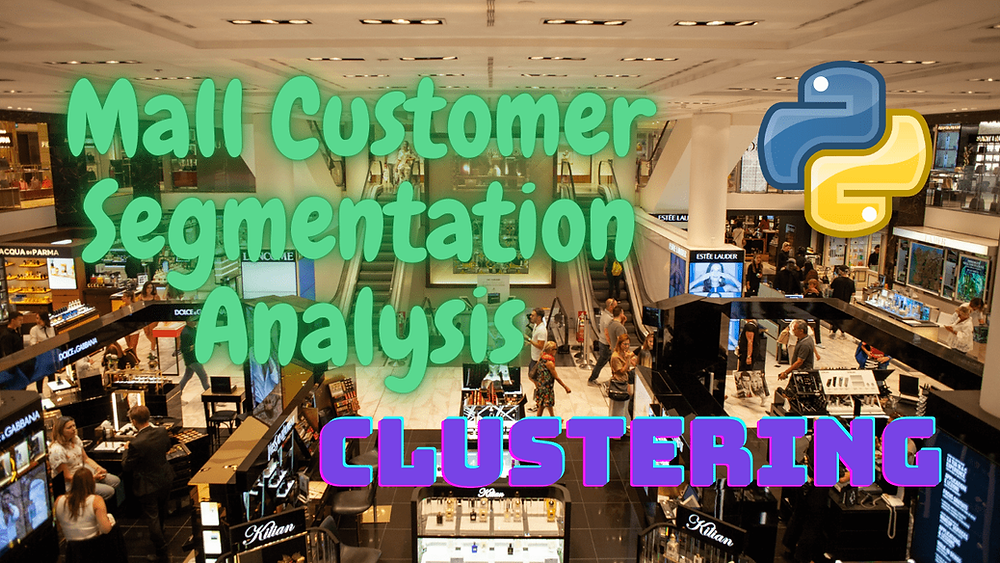

# 1. Load Python Modules

In [444]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans

# 2. Read the Dataset from CSV file  - Using Pandas

In [445]:
file_path=r"mall_customers.csv"
customers_df=pd.read_csv(file_path)
customers_df

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [446]:

#drop - sensitive - non imp columns
customers_df.drop(['customer_id',],axis=1,inplace=True)
customers_df.head()

,gender,age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# 3. Basic Inspection on given dataset


In [447]:
def basic_inspection_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_dataset(customers_df)

Top 5 Records of dataset
   gender  age  annual_income  spending_score
0    Male   19             15              39
1    Male   21             15              81
2  Female   20             16               6
3  Female   23             16              77
4  Female   31             17              40

Bottom Records of dataset
     gender  age  annual_income  spending_score
195  Female   35            120              79
196  Female   45            126              28
197    Male   32            126              74
198    Male   32            137              18
199    Male   30            137              83

Column/features/Variable  - Names of Given dataset
Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

Shape(rows x columns) - of Given dataset
(200, 4)

Data types - Given Column Names
gender            object
age                int64
annual_income      int64
spending_score     int64
dtype: object

Summry of dataset
<class 'pandas.core.frame.DataFrame'>
R

# 4. Handling Missing Values - Cat - Variables

In [448]:
customers_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

# 5. Categorical- UniVariable - Analysis -Using Pipeline

In [449]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 | Female |    112    |
| 1 |  Male  |    88     |
+---+--------+-----------+
gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 | Female |    112    |         56.0         |
| 1 |  Male  |    88     |         44.0         |
+---+--------+-----------+----------------------+


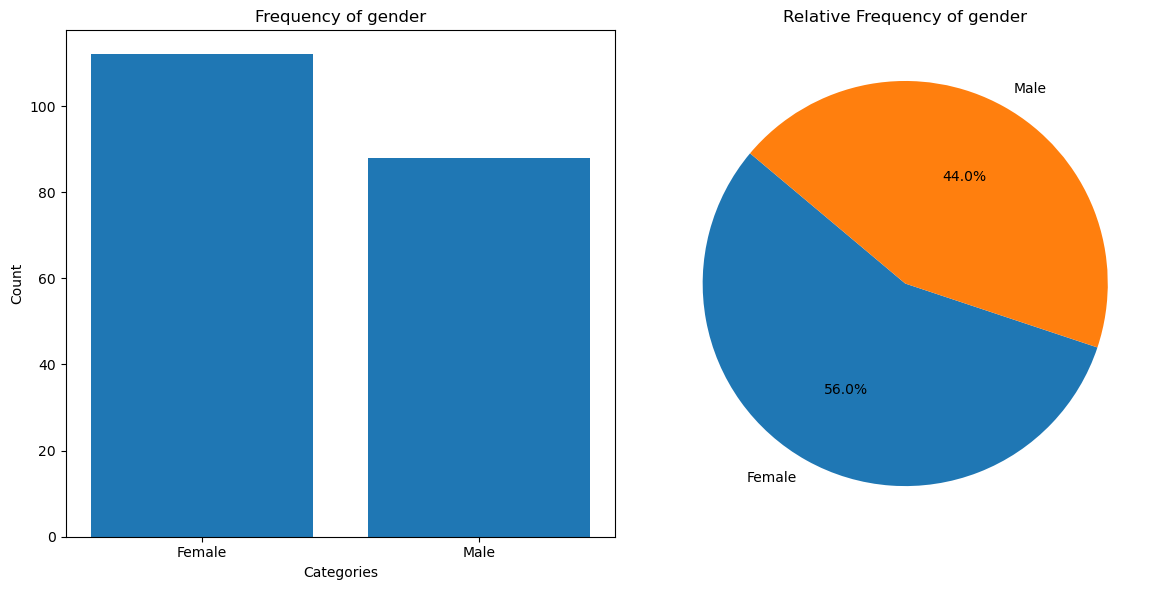

In [450]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(customers_df)

# 6. Handling Missing Values in Numerical Columns

In [451]:
customers_df.isnull().sum()

gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [452]:
customers_df.describe()

,age,annual_income,spending_score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [453]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
           
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()       
        

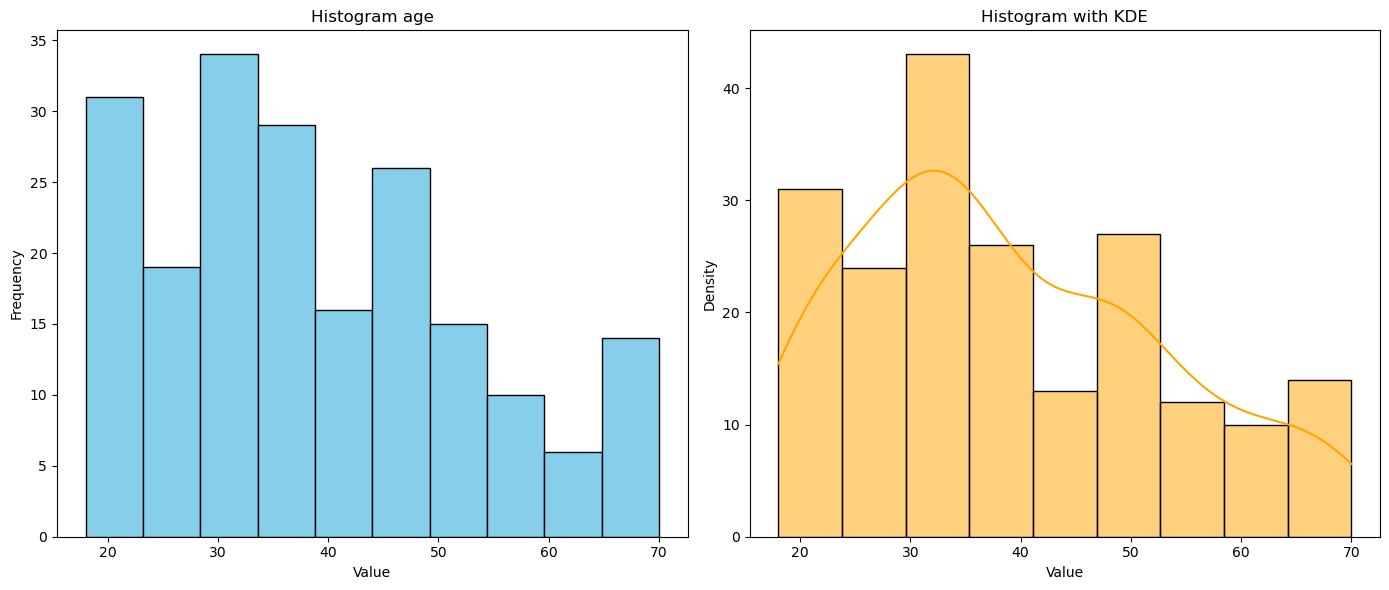

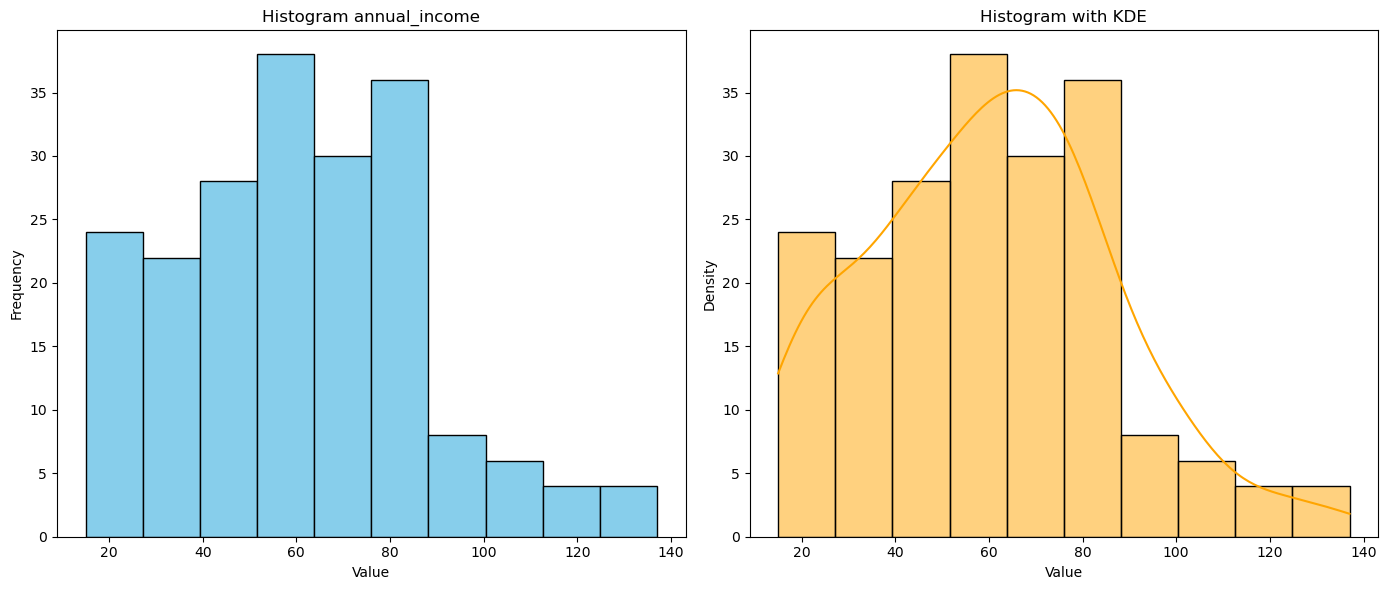

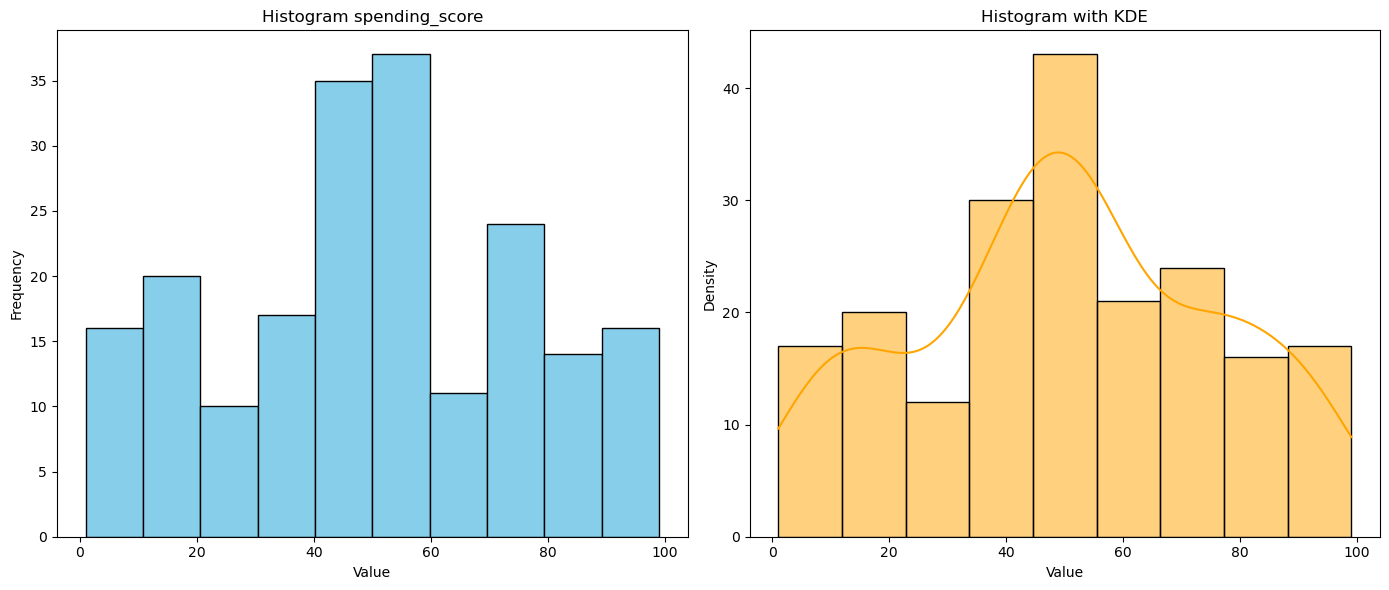

In [454]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])


# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(customers_df)

# 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## 9.2 Num Vs Num

In [455]:
customers_df.columns

Index(['gender', 'age', 'annual_income', 'spending_score'], dtype='object')

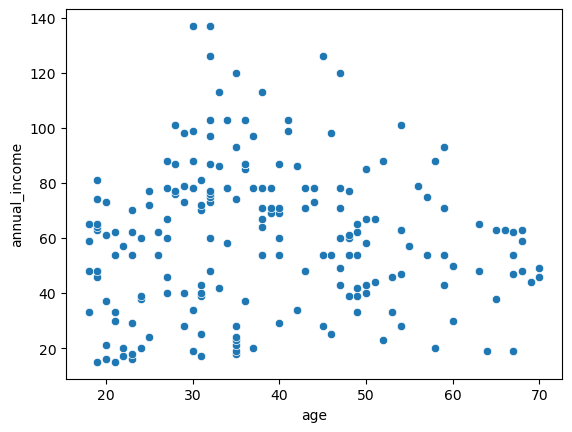

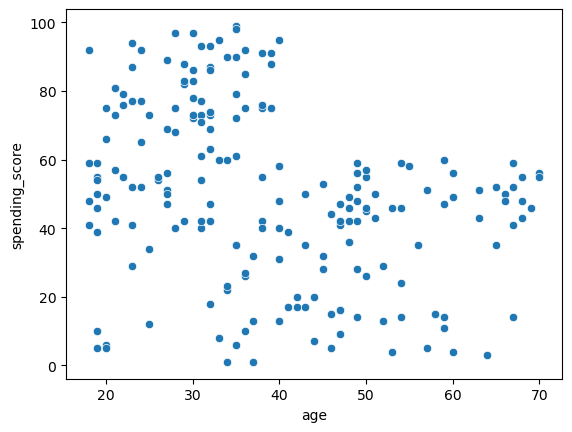

<Axes: xlabel='annual_income', ylabel='spending_score'>

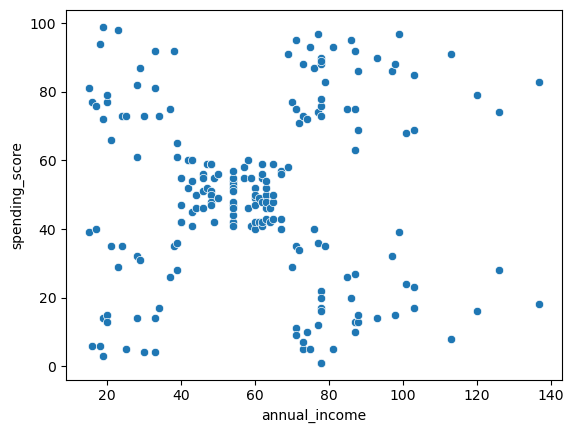

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting only numerical columns
numerical_columns = ['age', 'annual_income', 'spending_score']
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[1], data=customers_df)
plt.show()
sns.scatterplot(x=numerical_columns[0], y=numerical_columns[2], data=customers_df)
plt.show()
sns.scatterplot(x=numerical_columns[1], y=numerical_columns[2], data=customers_df)



## 9.3 Correaltion Numerical Columns

                     age  annual_income  spending_score
age             1.000000      -0.012398       -0.327227
annual_income  -0.012398       1.000000        0.009903
spending_score -0.327227       0.009903        1.000000


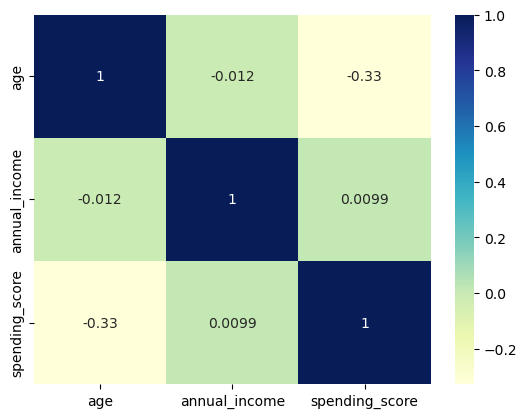

In [457]:
print(customers_df.corr(numeric_only=True))
sns.heatmap(customers_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization

In [458]:
scaler = MinMaxScaler()

# Fit and transform the scaler on the selected column
#scaled_column = scaler.fit_transform(customers_df[['age', 'annual_income', 'spending_score']])

# Replace the original column with the scaled column
#customers_df[['age', 'annual_income', 'spending_score']] = scaled_column
print(customers_df)

     gender  age  annual_income  spending_score
0      Male   19             15              39
1      Male   21             15              81
2    Female   20             16               6
3    Female   23             16              77
4    Female   31             17              40
..      ...  ...            ...             ...
195  Female   35            120              79
196  Female   45            126              28
197    Male   32            126              74
198    Male   32            137              18
199    Male   30            137              83

[200 rows x 4 columns]


# 12. Convert Cat - to - Numerical Columns

In [459]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
customers_df["gender"]=le.fit_transform(customers_df["gender"])
#customers_df=pd.get_dummies(customers_df,columns=["gender"])
customers_df

,gender,age,annual_income,spending_score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# ML Models

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

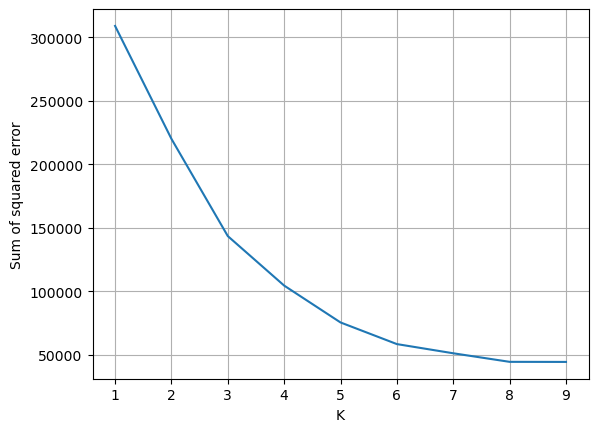

In [460]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(customers_df)
    sse.append(km.inertia_)
 
plt.grid()
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

## Model -  KMeans -  Clustering

In [461]:
km = KMeans(n_clusters=6,random_state=0)
y_predicted = km.fit_predict(customers_df)
#customers_df['cluster']=y_predicted

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [462]:
km.cluster_centers_

array([[ 0.43181818, 56.34090909, 53.70454545, 49.38636364],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.40909091, 44.31818182, 25.77272727, 20.27272727],
       [ 0.55882353, 41.64705882, 88.73529412, 16.76470588],
       [ 0.36842105, 27.31578947, 57.5       , 48.44736842],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [463]:
pd.DataFrame(km.labels_).value_counts()

0    44
1    39
4    38
3    34
5    23
2    22
Name: count, dtype: int64

In [464]:
from sklearn.metrics import silhouette_score
silhouette_score(customers_df,y_predicted)

0.4506609653808789

In [465]:
customers_df["cluster"]=y_predicted

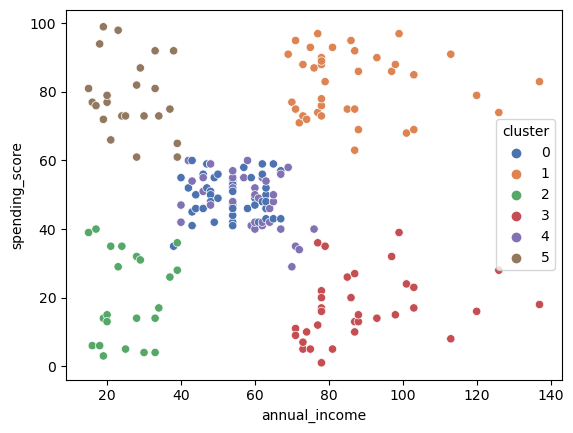

In [466]:
sns.scatterplot(x=numerical_columns[1], y=numerical_columns[2], hue="cluster", data=customers_df,palette="deep")
plt.show()

# Conclusion
1. We used K=6 - did the K Means Clustering
2. We got silhouette_score 0.45